In [61]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
import networkx as nx
import matplotlib.pyplot as plt

In [62]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [135]:
def extract_pairs(graph:nx.graph):
    # print('d')

    # collected_edges = edges
    G = graph.copy()
    sequences = set()
    edges = list(G.edges)
    
    if len(edges) == 1:
        # print('base')
        # print(set([frozenset([edges[0]])]))
        return(set([frozenset([edges[0]])]))
    for e in edges:
        G = graph.copy()
        
        G.remove_node(e[0])
        G.remove_node(e[1])
        edges = list(G.edges)

        for s in extract_pairs(G):
            # print('loop')
            # print(s)
            n = frozenset([frozenset([e]).union(s)])
            sequences = sequences.union(n)
    return(sequences)

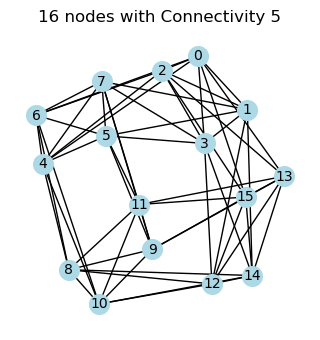

In [3]:


# Create an empty graph
G = nx.Graph()

# The data containing two arrays
data = orders.n_random_c7_orders(16,1001)
# data = orders.n_random_line_orders(16,n = 1000,chunk_sizes = [4,4,4,4])

# Iterate through the data arrays
for array in data:
    # For each group in the array
    for group in array:
        # Create edges between nodes in the same group
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                G.add_edge(group[i], group[j])

# Plot the graph
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(G, seed=42)  # Define the layout for the nodes

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.title("16 nodes with Connectivity 5")
plt.show()


In [122]:
def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    G = nx.Graph()
    
    for node in range(n):
        for m in s:
            G.add_edge(node,(node+m)%n)
    return(G)

def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    n = np.array(n)
    n = np.pad(n, (0,3-len(n)), 'constant', constant_values=(1))
    print(n)
    s = [np.array(e) for e in s]
    G = nx.Graph()
    
    for id0 in range(n[0]):
        for id1 in range(n[1]):
            for id2 in range(n[2]):

                for m in s:
                    node = np.array([id0,id1,id2])
                    
                    e = np.array(tuple((node+m)%n))
                    
                    G.add_edge(tuple(node),tuple(e))
    return(G)

[1 2 4]


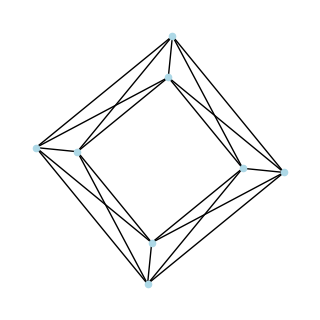

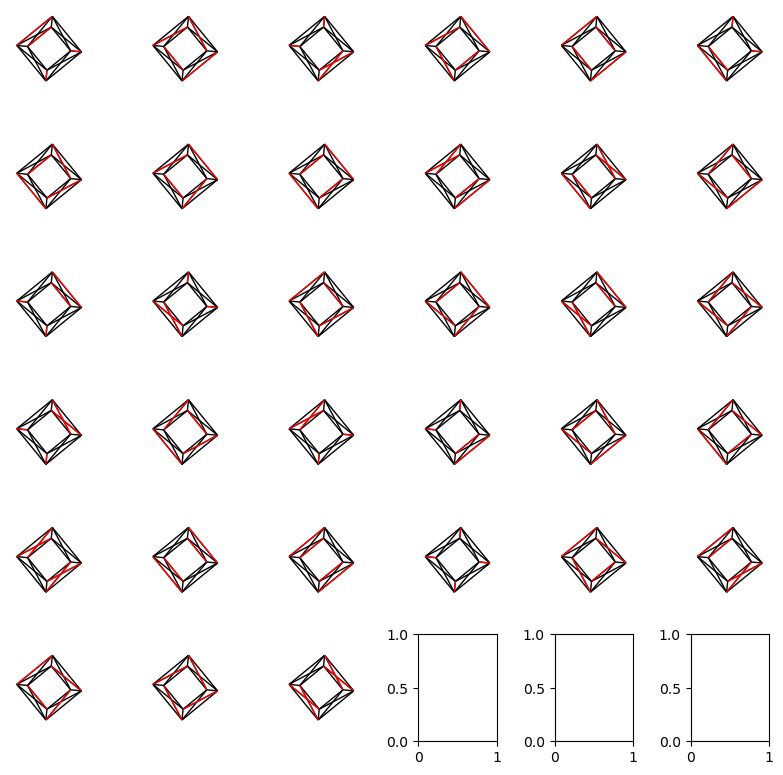

In [136]:
N = 4
g = cay([1,2,N],[[0,1,0],[0,0,1],[0,1,-1],[0,1,1],[0,1,-1]])

plt.figure(1,figsize=(3,3))
pos = dict()
r = 1
for i0 in range(2):
    for i1 in range(2):
        for i2 in range(N):
            theta = i2/N*2*np.pi-1/10
            theta+=i0/5
            
            if i2%2:
                r = 1+i1/2
            else:
                r = 1+(-i1/2)+.5
            pos[(i0,i1,i2)] = np.array([r*np.cos(theta),r*np.sin(theta)])
    
nx.draw(g, pos, with_labels=False, node_color='lightblue', node_size=20, font_size=10)
plt.show()


a = extract_pairs(g)
side = int(np.sqrt(len(a)))+1
fig, axes = plt.subplots(side, side, figsize=(8, 8))  # Create a 2x2 grid of subplots

for idx, s in enumerate(a):
    subg = nx.Graph()
    for e in s:
        subg.add_edge(*e)
    
    # Plot the subgraph in the corresponding subplot
    ax = axes[idx // side, idx % side]
    # ax.set_title(f'Subgraph {idx + 1}')
    ax.set_aspect('equal')
    nx.draw(g, pos, ax=ax, with_labels=False, node_color='lightblue', node_size=0)
    nx.draw_networkx_edges(g, pos, ax=ax, edgelist=subg.edges(), edge_color='red', width=1)

plt.tight_layout()
plt.show()

[ 1  1 16]


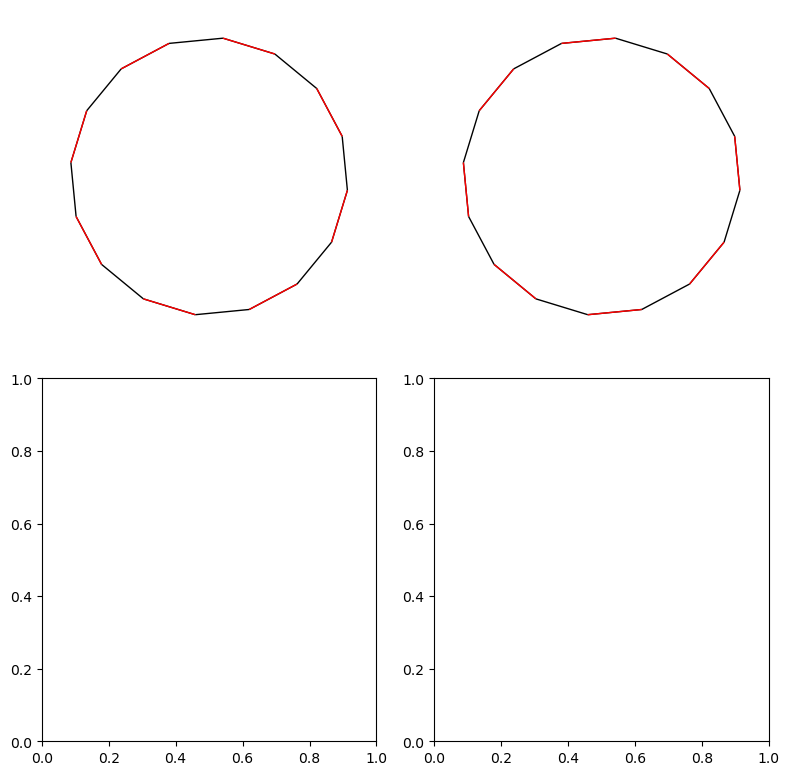

In [138]:
N = 16
g = cay([1,1,N],[[0,0,1]])

pos = dict()
r = 1
for i0 in range(2):
    for i1 in range(2):
        for i2 in range(N):
            theta = i2/N*2*np.pi-1/10
            pos[(i0,i1,i2)] = np.array([r*np.cos(theta),r*np.sin(theta)])
            
nx.draw(g, pos, ax=ax, with_labels=False, node_color='lightblue', node_size=0)
plt.show() 
            

a = extract_pairs(g)
for S in a:
    if len(S)!=N/2:
        a = a-set([S])
        
        
side = int(np.sqrt(len(a)))+1
fig, axes = plt.subplots(side, side, figsize=(8, 8))  # Create a 2x2 grid of subplots

for idx, s in enumerate(a):
    subg = nx.Graph()
    for e in s:
        subg.add_edge(*e)
    
    # Plot the subgraph in the corresponding subplot
    ax = axes[idx // side, idx % side]
    # ax.set_title(f'Subgraph {idx + 1}')
    # print(s)
    ax.set_aspect('equal')
    nx.draw(g, pos, ax=ax, with_labels=False, node_color='lightblue', node_size=0)
    nx.draw_networkx_edges(g, pos, ax=ax, edgelist=subg.edges(), edge_color='red', width=1)

plt.tight_layout()
plt.show()

[2 2 4]


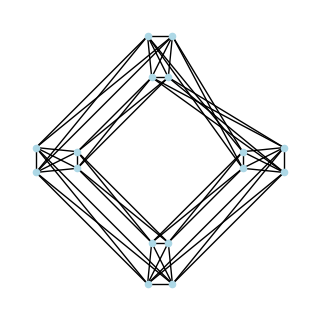

In [103]:
def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    n = np.array(n)
    n = np.pad(n, (0,3-len(n)), 'constant', constant_values=(1))
    print(n)
    s = [np.array(e) for e in s]
    G = nx.Graph()
    
    for id0 in range(n[0]):
        for id1 in range(n[1]):
            for id2 in range(n[2]):

                for m in s:
                    node = np.array([id0,id1,id2])
                    
                    e = np.array(tuple((node+m)%n))
                    if (id2 == 0 and e[2] == 1) :
                        e = ((e[0])%2,(e[1]+1)%2,e[2])
                    if (id2 == 1 and e[2] == 0) :
                        e = ((e[0])%2,(e[1]+1)%2,e[2])
                    
                    G.add_edge(tuple(node),tuple(e))
    return(G)



N = 4
g = cay([2,2,N],[[1,0,0],[0,1,0],[1,1,0],[0,1,1],[0,1,-1],[1,1,1],[1,1,-1]])

plt.figure(1,figsize=(3,3))
pos = dict()
r = 1
for i0 in range(2):
    for i1 in range(2):
        for i2 in range(N):
            theta = i2/N*2*np.pi-1/10
            theta+=i0/5
            
            if i2%2:
                r = 1+i1/2
            else:
                r = 1+(-i1/2)+.5
            pos[(i0,i1,i2)] = np.array([r*np.cos(theta),r*np.sin(theta)])
    
nx.draw(g, pos, with_labels=False, node_color='lightblue', node_size=20, font_size=10)
plt.show()


[1 1 8]


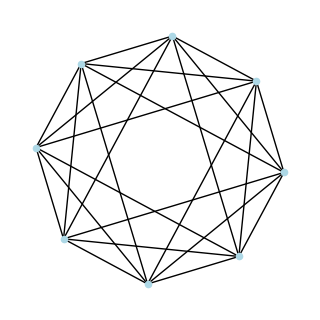

In [59]:
N = 8
g = cay([1,1,N],[[0,0,1],[0,0,2],[0,0,3]])

plt.figure(1,figsize=(3,3))
pos = dict()
r = 1
for i0 in range(2):
    for i1 in range(2):
        for i2 in range(N):
            theta = i2/N*2*np.pi-1/10
            pos[(i0,i1,i2)] = np.array([r*np.cos(theta),r*np.sin(theta)])
    
nx.draw(g, pos, with_labels=False, node_color='lightblue', node_size=20, font_size=10)
plt.show()